## Text length per model

In [29]:
from pathlib import Path
import json
import numpy as np
import re

In [20]:
def get_mean_length_for_dir(indir):    
    indir = Path(indir)
    files = list(indir.glob("humor_*.json"))
    
    lens = []

    for fname in files:
        with open(fname, "r") as f:
            data = json.load(f)
            lens.append(len(data["reason"].split(" ")))
    return np.mean(np.array(lens)), np.std(np.array(lens)), np.min(np.array(lens)), np.max(np.array(lens))


In [21]:
model_names = ["gpt-4o", "gpt-4o-mini", "gpt-35-turbo", "mistral-large-latest", "mistral-small"]
for model_name in model_names:
    provider = re.search("^([^-]+)-", model_name).group(1)
    mean, std, min_len, max_len = get_mean_length_for_dir(f"/mnt/storage_temp/restic_restore/C/Users/PC/bp2/__last_week/p/o/pp8_mine/pp8_humor_repo/outputs/model_responses/{provider}/{model_name}")
    print(f"{model_name}: mean={mean:.2f}, std={std:.2f}, min={min_len}, max={max_len}")


gpt-4o: mean=122.11, std=22.31, min=60, max=187
gpt-4o-mini: mean=171.04, std=10.92, min=95, max=204
gpt-35-turbo: mean=73.58, std=17.04, min=3, max=130
mistral-large-latest: mean=120.72, std=23.57, min=81, max=201
mistral-small: mean=82.09, std=18.99, min=44, max=149


## Author matches

In [31]:
out_dir_plots = "../outputs/plots"

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.rcParams['font.family'] = "Arial"

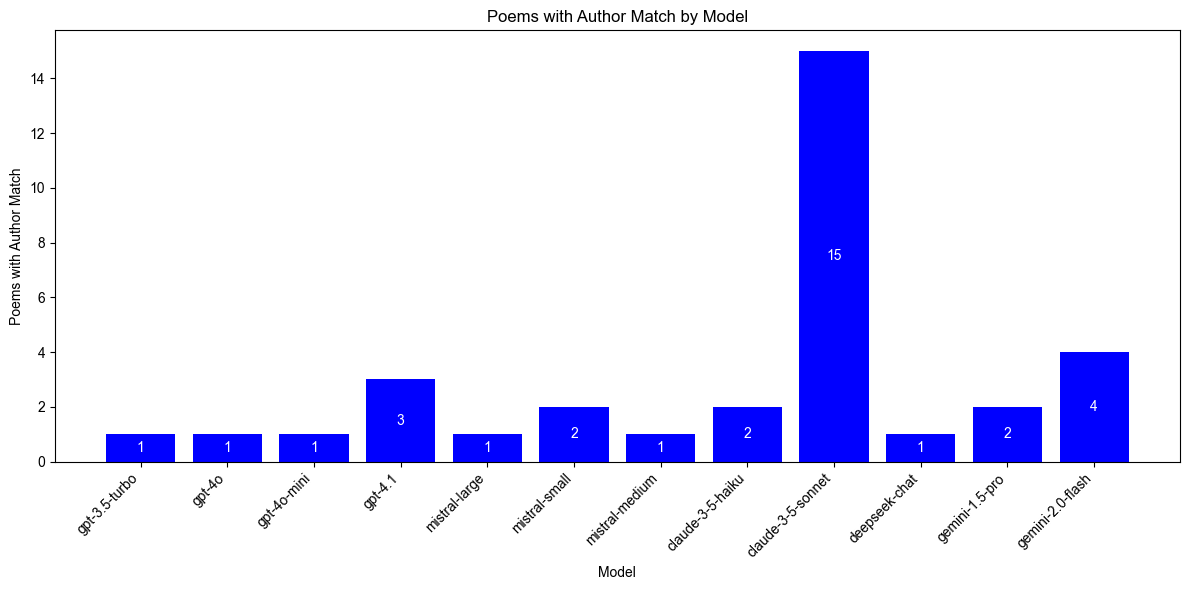

In [8]:
models = [
    "gpt-3.5-turbo", "gpt-4o", "gpt-4o-mini", "gpt-4.1",
    "mistral-large", "mistral-small", "mistral-medium",
    "claude-3-5-haiku", "claude-3-5-sonnet", "deepseek-chat",
    "gemini-1.5-pro", "gemini-2.0-flash"
]
values = [1, 1, 1, 3, 1, 2, 1, 2, 15, 1, 2, 4]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, values, color='blue')

# labeled bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height)}',
             ha='center', va='center', color='white', fontsize=10)

# Aesthetics
plt.xticks(rotation=45, ha='right')
plt.ylabel("Poems with Author Match")
plt.xlabel("Model")
plt.title("Poems with Author Match by Model")
plt.tight_layout()

plt.show()


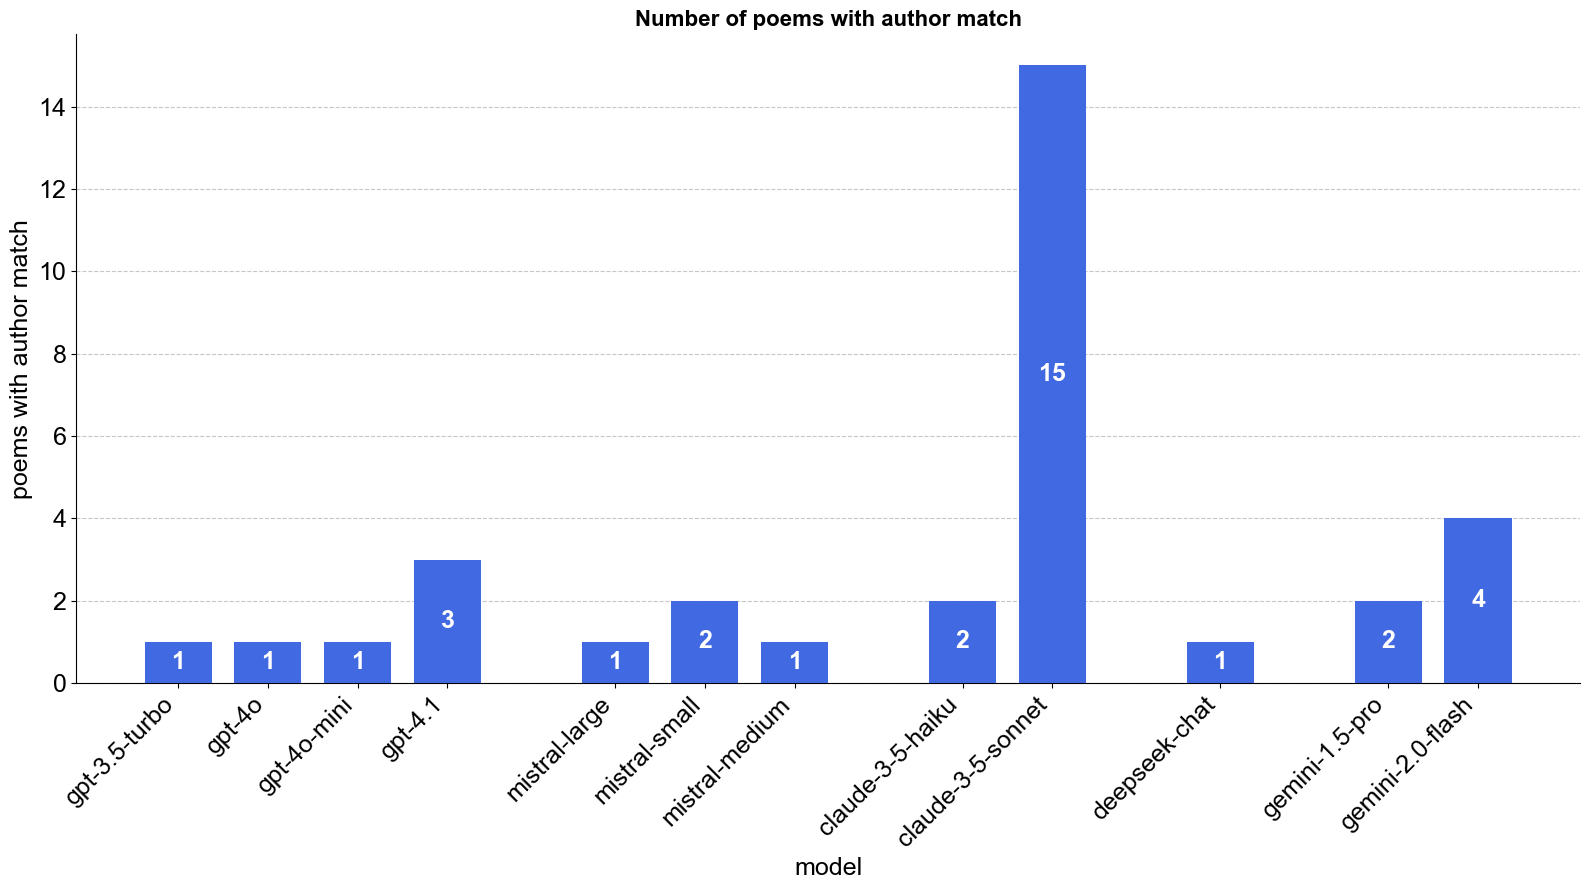

In [60]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "gpt-3.5-turbo", "gpt-4o", "gpt-4o-mini", "gpt-4.1",
    "mistral-large", "mistral-small", "mistral-medium",
    "claude-3-5-haiku", "claude-3-5-sonnet",
    "deepseek-chat",
    "gemini-1.5-pro", "gemini-2.0-flash"
]
poems_matched = [1, 1, 1, 3, 1, 2, 1, 2, 15, 1, 2, 4]

# add space after these bars
spacing_after_models = [
    "gpt-4.1",
    "mistral-medium",
    "claude-3-5-sonnet",
    "deepseek-chat"
]
extra_space_amount = 0.7  # This is in addition to the default gap between bars
                          # (which is effectively 1 unit wide bars with 0.2 gap if width=0.8)
                          # So, total space = 1 (for next bar) + extra_space_amount.

# Bars with custom x-position
x_positions = []
current_pos = 0
for i, name in enumerate(model_names):
    x_positions.append(current_pos)
    current_pos += 0.8  # Default increment for the next bar
    # extra space if model is last in group (but not last overall)
    if name in spacing_after_models and i < len(model_names) - 1: 
        current_pos += extra_space_amount

plt.figure(figsize=(16, 9))

# not need to assign subplots and axes if set zorder on the bars
#plt.subplots(figsize=(16, 9)) # Increased figure size for more spacing
#ax.patch.set_zorder(-1)

# y-axis grid
#ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# plot with custom x positions
bar_width = 0.6 # Standard bar width
bars = plt.bar(x_positions, poems_matched, color='royalblue', width=bar_width, zorder=3)

# 6. Add labels inside the columns
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval / 2,
        int(yval),
        ha='center',
        va='center',
        color='white',
        fontsize=18,
        fontweight='bold'
    )

plt.xlabel("model", fontsize=18)
plt.ylabel("poems with author match", fontsize=18)
plt.yticks(fontsize=18)
plt.title("Number of poems with author match", fontsize=16, fontweight='bold')

# x-ticks at custom positions, labeled with model names
plt.xticks(x_positions, model_names, rotation=45, ha="right", fontsize=18)

# prevent labels from being cut off
plt.tight_layout()

# remove some lines
ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

out_fn = Path(out_dir_plots) / f"poems_with_author_match.png"
plt.savefig(out_fn, format='png', dpi=300)

plt.show()


## Century matches

### Number

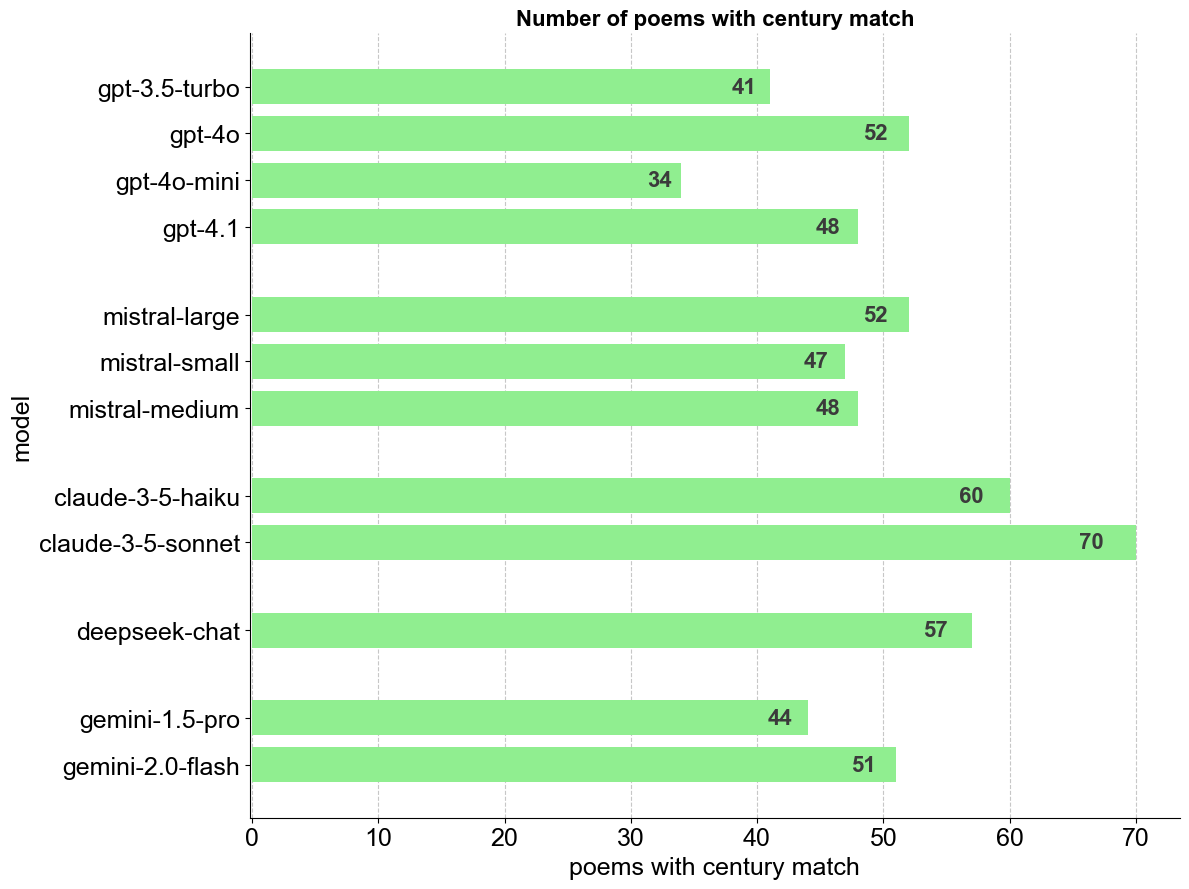

In [81]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "gpt-3.5-turbo", "gpt-4o", "gpt-4o-mini", "gpt-4.1",
    "mistral-large", "mistral-small", "mistral-medium",
    "claude-3-5-haiku", "claude-3-5-sonnet",
    "deepseek-chat",
    "gemini-1.5-pro", "gemini-2.0-flash"
]
poems_matched = [41, 52, 34, 48, 52, 47, 48, 60, 70, 57, 44, 51]

# add space after these bars
spacing_after_models = [
    "gpt-4.1",
    "mistral-medium",
    "claude-3-5-sonnet",
    "deepseek-chat"
]
extra_space_amount = 0.7  # This is in addition to the default gap between bars
                          # (which is effectively 1 unit wide bars with 0.2 gap if width=0.8)
                          # So, total space = 1 (for next bar) + extra_space_amount.

# Bars with custom x-position
y_positions = []
current_pos = 0
for i, name in enumerate(model_names):
    y_positions.append(current_pos)
    current_pos += 0.8  # Default increment for the next bar
    # extra space if model is last in group (but not last overall)
    if name in spacing_after_models and i < len(model_names) - 1: 
        current_pos += extra_space_amount

plt.figure(figsize=(12, 9))

# not need to assign subplots and axes if set zorder on the bars
#plt.subplots(figsize=(16, 9)) # Increased figure size for more spacing
#ax.patch.set_zorder(-1)

# y-axis grid
#ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

# plot with custom x positions
bar_width = 0.6 # Standard bar width
bars = plt.barh(y_positions, poems_matched, color='lightgreen', height=bar_width, zorder=3)
ax = plt.gca()
ax.invert_yaxis()
# prevent overlap between bar and y-axis
xmin, xmax = ax.get_xlim()
ax.set_xlim(left=xmin - 0.2)

# 6. Add labels inside the columns
for i, bar in enumerate(bars):
    width = bar.get_width()
    y_center = bar.get_y() + bar.get_height() / 2

    ax.text(
        width - width / 20,
        y_center,
        int(width),
        ha='center',
        va='center',
        color='#3b3b3b',
        fontsize=16,
        fontweight='bold'
    )

plt.ylabel("model", fontsize=18)
plt.xlabel("poems with century match", fontsize=18)
plt.xticks(fontsize=18)
plt.title("Number of poems with century match", fontsize=16, fontweight='bold')

# x-ticks at custom positions, labeled with model names
plt.yticks(y_positions, model_names, fontsize=18)

# prevent labels from being cut off
plt.tight_layout()

# remove some lines
ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

out_fn = Path(out_dir_plots) / f"poems_with_century_match.png"
plt.savefig(out_fn, format='png', dpi=300)

plt.show()


### Mean distance to actual century

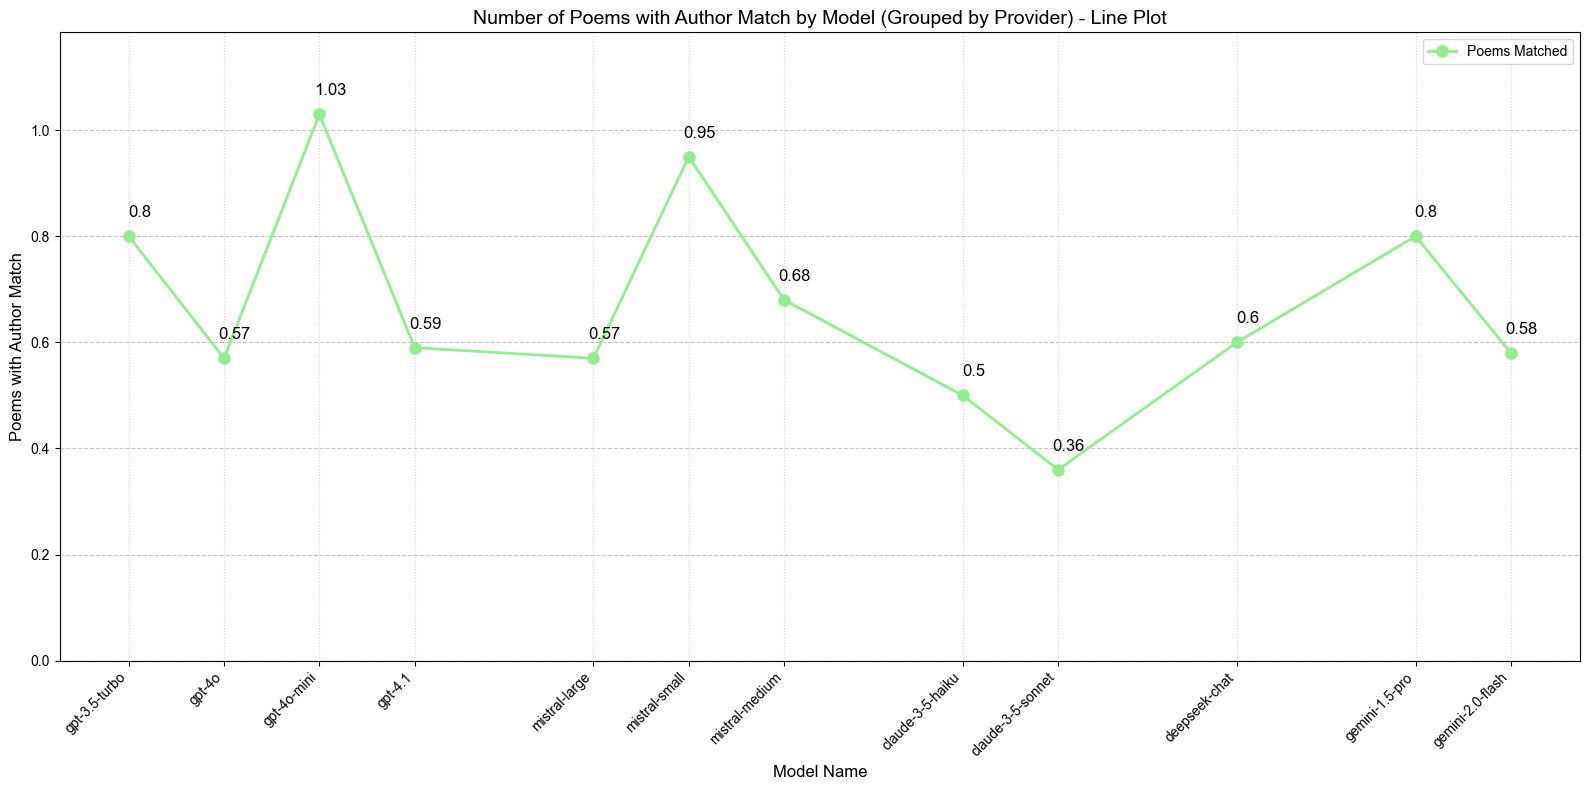

In [110]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "gpt-3.5-turbo", "gpt-4o", "gpt-4o-mini", "gpt-4.1",
    "mistral-large", "mistral-small", "mistral-medium",
    "claude-3-5-haiku", "claude-3-5-sonnet",
    "deepseek-chat",
    "gemini-1.5-pro", "gemini-2.0-flash"
]
mean_distances = [0.8, 0.57, 1.03, 0.59, 0.57, 0.95, 0.68, 0.5, 0.36, 0.6, 0.8, 0.58]

# add space after these bars
spacing_after_models = [
    "gpt-4.1",
    "mistral-medium",
    "claude-3-5-sonnet",
    "deepseek-chat"
]
extra_space_amount = 0.7  # This is in addition to the default gap between bars
                          # (which is effectively 1 unit wide bars with 0.2 gap if width=0.8)
                          # So, total space = 1 (for next bar) + extra_space_amount.

# Custom x-positions
x_positions = []
current_pos = 0
for i, name in enumerate(model_names):
    x_positions.append(current_pos)
    current_pos += 0.8  # Default increment for the next bar
    # extra space if model is last in group (but not last overall)
    if name in spacing_after_models and i < len(model_names) - 1: 
        current_pos += extra_space_amount

plt.figure(figsize=(16, 8))

# not need to assign subplots and axes if set zorder on the bars
#plt.subplots(figsize=(16, 9)) # Increased figure size for more spacing
#ax.patch.set_zorder(-1)

# y-axis grid
#ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
#plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# 5. Create the line plot using custom x_positions
plt.plot(x_positions, mean_distances,
         color='lightgreen',      # Line color
         marker='o',        # Marker style for each data point
         linestyle='-',     # Line style
         linewidth=2,       # Line width
         markersize=8,      # Size of the markers
         label='Poems Matched') # Label for the legend

# 6. Add labels (numbers) at each data point
#    Adjust y_offset if text overlaps with markers/line
y_offset = 0.03 # Small offset to place text slightly above the marker
#if max(mean_distances) > 1: # If values are large, adjust offset proportionally
#    y_offset = max(mean_distances) * 0.02

for i, (x_pos, y_val) in enumerate(zip(x_positions, mean_distances)):
    plt.text(
        x_pos + 0.09,                           # x-position of the point
        y_val + y_offset,                # y-position, slightly offset from the point
        y_val,                      # The value to display
        ha='center',                     # Horizontal alignment
        va='bottom',                     # Vertical alignment (places text above the y-coord)
        color='black',                   # Text color (black usually good for line plots)
        fontsize=12,
        # fontweight='bold' # Optional: for bolder text
    )

# 7. Add labels, title, and set x-ticks
plt.xlabel("Model Name", fontsize=12)
plt.ylabel("Poems with Author Match", fontsize=12)
plt.title("Number of Poems with Author Match by Model (Grouped by Provider) - Line Plot", fontsize=14)

# Set the x-ticks to be at our custom positions, labeled with model names
plt.xticks(x_positions, model_names, rotation=45, ha="right")

# 8. Add a light grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5) # Optional: light vertical grid

# 9. Add a legend (if you used the 'label' argument in plt.plot)
plt.legend()

# 10. Adjust y-axis limits if needed, e.g., to give more space for text labels
plt.ylim(0, max(mean_distances) * 1.15) # Add 15% padding at the top

# 11. Adjust layout
plt.tight_layout()


#out_fn = Path(out_dir_plots) / f"poems_century_distance.png"
#plt.savefig(out_fn, format='png', dpi=300)

plt.show()


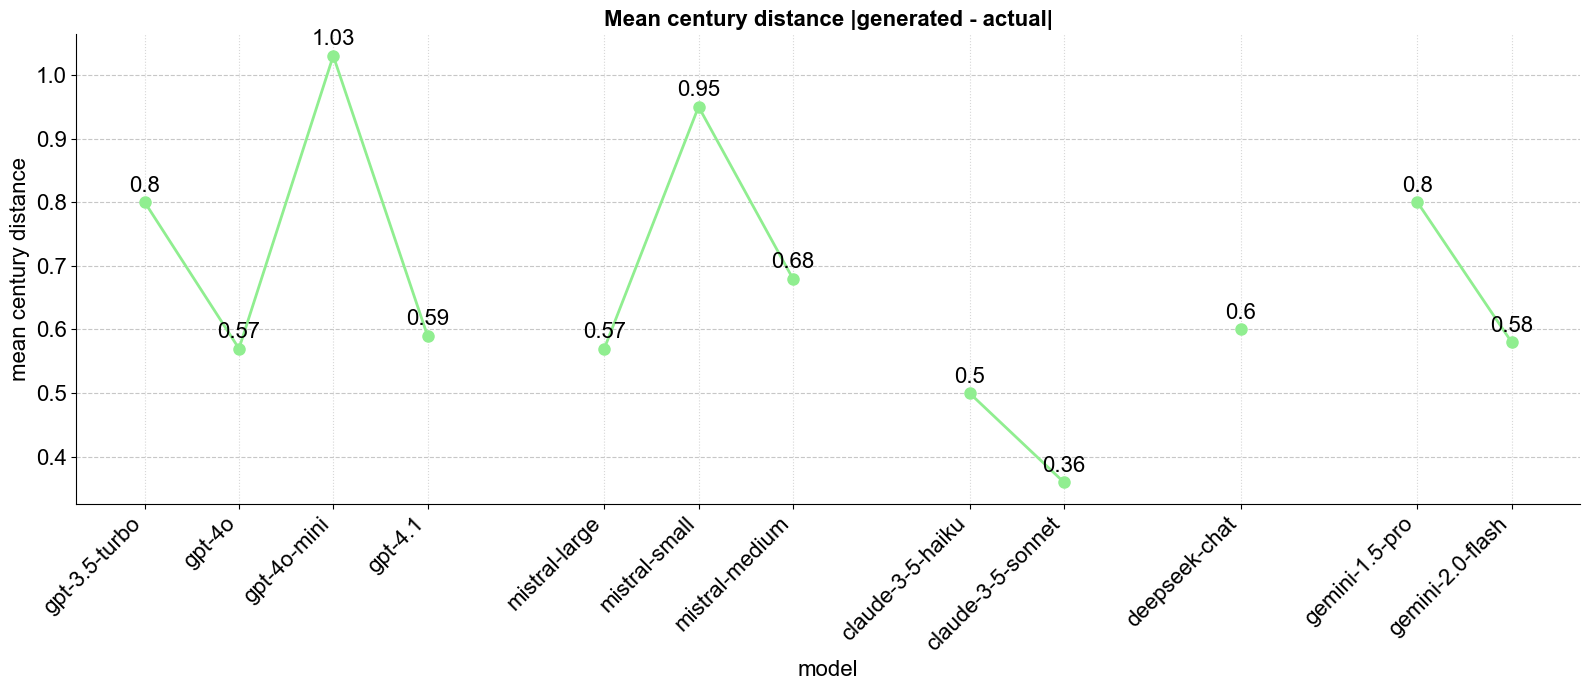

In [137]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "gpt-3.5-turbo", "gpt-4o", "gpt-4o-mini", "gpt-4.1",
    "mistral-large", "mistral-small", "mistral-medium",
    "claude-3-5-haiku", "claude-3-5-sonnet",
    "deepseek-chat",
    "gemini-1.5-pro", "gemini-2.0-flash"
]
mean_distances = [0.8, 0.57, 1.03, 0.59, 0.57, 0.95, 0.68, 0.5, 0.36, 0.6, 0.8, 0.58]

# add space after these bars
spacing_after_models = [
    "gpt-4.1",
    "mistral-medium",
    "claude-3-5-sonnet",
    "deepseek-chat"
]
extra_space_amount = 0.7  # This is in addition to the default gap between bars
                          # (which is effectively 1 unit wide bars with 0.2 gap if width=0.8)
                          # So, total space = 1 (for next bar) + extra_space_amount.

# Custom x-positions
x_positions = []
current_pos = 0
for i, name in enumerate(model_names):
    x_positions.append(current_pos)
    current_pos += 0.8  # Default increment for the next bar
    # extra space if model is last in group (but not last overall)
    if name in spacing_after_models and i < len(model_names) - 1: 
        current_pos += extra_space_amount

plt.figure(figsize=(16, 7))


# 5. Define group boundaries (indices)
#    These are the indices of the *last* model in each group that will be connected
group_end_indices = [model_names.index(m) for m in spacing_after_models if m in model_names]
# Add the index of the very last model to ensure the last group is plotted
if not group_end_indices or group_end_indices[-1] < len(model_names) - 1:
    group_end_indices.append(len(model_names) - 1)
group_end_indices = sorted(list(set(group_end_indices))) # Ensure sorted and unique


start_idx = 0
plotted_legend_label = False # To ensure legend label is added only once

for i, end_idx in enumerate(group_end_indices):
    # Slice data for the current segment
    segment_x = x_positions[start_idx : end_idx + 1]
    segment_y = mean_distances[start_idx : end_idx + 1]
    segment_names = model_names[start_idx : end_idx + 1] # For labels

    # Plot the current segment
    #label_for_segment = None
    #if not plotted_legend_label:
    #    label_for_segment = 'Poems Matched'
    #    plotted_legend_label = True

    plt.plot(segment_x, segment_y,
             color='lightgreen',
             marker='o',
             linestyle='-',
             linewidth=2,
             markersize=8,
             label=label_for_segment)

    # Add text labels for points in this segment
    y_offset = 0.01
    x_offset = 0.0
    #if max(mean_distances) > 10:
    #    y_offset = max(mean_distances) * 0.02

    for k in range(len(segment_x)):
        plt.text(
            segment_x[k] + x_offset,
            segment_y[k] + y_offset,
            segment_y[k],
            ha='center',
            va='bottom',
            color='black',
            fontsize=16
        )
    # Update start_idx for the next segment
    start_idx = end_idx + 1



# 7. Add labels, title, and set x-ticks
plt.xlabel("model", fontsize=16)
plt.ylabel("mean century distance", fontsize=16)
plt.title("Mean century distance |generated - actual|", fontsize=16, fontweight='bold')

# Set the x-ticks to be at our custom positions, labeled with model names
plt.xticks(x_positions, model_names, rotation=45, ha="right", fontsize=16)

plt.yticks(fontsize=16)


# 8. Add a light grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.5) # Optional: light vertical grid

# 9. Add a legend (if you used the 'label' argument in plt.plot)
#plt.legend()

# 10. Adjust y-axis limits if needed, e.g., to give more space for text labels
#plt.ylim(0, max(mean_distances) * 1.15) # Add 15% padding at the top

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# 11. Adjust layout
plt.tight_layout()


out_fn = Path(out_dir_plots) / f"poems_century_distance.png"
plt.savefig(out_fn, format='png', dpi=300)

plt.show()
